In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [7]:
import pandas as pd

# Loading the cleaned data
data = pd.read_csv("../data/processed_data.csv")

# Checking the data 
data.head()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading the data
df = pd.read_csv(r'..\data\processed_data.csv')

#  Separate features (remove target/label)
X = df.drop(columns=['FinalGrade'])

# Step 3: Applying Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Converting scaled data back into DataFrame
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X.columns
)

# Step 5: checking by verifying mean ~0 and std ~1
print("Scaled data preview:")
print(X_scaled_df.head())




Scaled data preview:
   StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0   -0.167633   -1.411667  -0.149721        -1.209965   -1.301687  0.283687   
1   -0.167633   -1.411667  -0.149721        -1.209965   -1.301687  0.283687   
2   -0.167633   -1.411667  -0.149721        -1.209965   -1.301687  0.283687   
3   -0.167633   -1.411667  -0.149721         0.826470   -1.301687  0.283687   
4   -0.167633   -1.411667  -0.149721         0.826470   -1.301687  0.283687   

     Gender       Age  LearningStyle  OnlineCourses  Discussions  \
0 -1.109914 -1.289686       0.435384      -0.309518     0.806547   
1 -1.109914 -0.151436       1.333936       0.999258    -1.239853   
2 -1.109914  1.271376      -0.463169       1.490049    -1.239853   
3 -1.109914 -1.289686       0.435384      -0.309518     0.806547   
4 -1.109914 -0.151436       1.333936       0.999258    -1.239853   

   AssignmentCompletion  ExamScore   EduTech  StressLevel  
0             -1.059520  -1.715729 

checking if the mean ~ 0 and std ~ 1 

In [ ]:
print("\nMean (should be ~0):")
print(X_scaled_df.mean().round(3))

print("\nStd Dev (should be ~1):")
print(X_scaled_df.std().round(3))
# now the data is in the same scale for clustering and no outliers and missing values

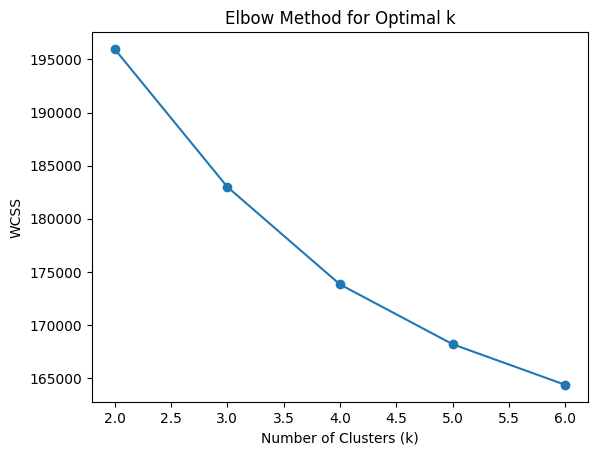

Cluster
1    7170
2    5790
0    1043
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ---- Step 6: using Elbow Method before its safe and it do NOT change data ----
wcss = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2, 7), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

# ---- Step 7: Apply KMeans (choose k = 3 as a safe default) ----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled_df)

# ---- Step 8: Add cluster labels to original dataframe ----
df['Cluster'] = clusters

# ---- Step 9: Check cluster distribution ----
print(df['Cluster'].value_counts())

# ---- Step 10: Save clustered data for next (prediction) file ----
df.to_csv(r'..\data\clustered_data.csv', index=False)


In [16]:
# Cluster-wise mean analysis
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         StudyHours  Attendance  Resources  Extracurricular  Motivation  \
Cluster                                                                   
0         19.849473   81.251198   1.162991         0.625120    0.881112   
1         19.911297   80.372803   1.099163         0.595397    0.913389   
2         20.106563   79.782902   1.100345         0.587047    0.900864   

         Internet    Gender        Age  LearningStyle  OnlineCourses  \
Cluster                                                                
0             0.0  0.535954  23.549377       1.479386       9.903164   
1             1.0  1.000000  23.455788       1.547559       9.937099   
2             1.0  0.000000  23.623661       1.482211       9.834024   

         Discussions  AssignmentCompletion  ExamScore   EduTech  StressLevel  \
Cluster                                                                        
0           0.619367             74.918504  70.665388  0.701822     1.312560   
1           0.603626   